Download data and unzip data from 
https://metservicenz.sharepoint.com/sites/GNS-FR/Shared%20Documents/General/202107070000_Taranaki_high.zip

In [1]:
#! ls 202107070000_Taranaki_high/**/*

In [2]:
import os
import glob
import numpy as np
import pandas as pd 
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
almost_zero=1.0e-6
clon=180

# problem - plots land everywhere..
land_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", facecolor=cfeature.COLORS["land"]
)

def plot_decor(ax):
    ax.coastlines("10m")
    # ax.add_feature(ocean_10m, zorder=0)
    ax.add_feature(land_10m, zorder=-1)
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

#lev_exp = np.arange(np.log10(almost_zero), np.log10(da1).max() + 1)
lev_exp = np.arange(np.log10(almost_zero), np.log10(100.).max() + 1)
print(lev_exp)
levs = np.power(10, lev_exp)
print(levs)


[-6. -5. -4. -3. -2. -1.  0.  1.  2.]
[1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


In [3]:
data_dir = '202107070000_Taranaki_high'
fname = '21070700_Taranaki_12.0_0.01.nc'

In [4]:
files = glob.glob('{}/**/{}'.format(data_dir,fname), recursive=True)
files.sort()
for x in files:
    print(x)

202107070000_Taranaki_high/hysplit.ashfall-gns.ecmwf_z10_newarl_Taranaki_high/devrun_d6689d65/21070700_Taranaki_12.0_0.01.nc
202107070000_Taranaki_high/hysplit.ashfall-gns.gec00_z10_newarl_Taranaki_high/devrun_a80b7d34/21070700_Taranaki_12.0_0.01.nc
202107070000_Taranaki_high/hysplit.ashfall-gns.gep01_z10_newarl_Taranaki_high/devrun_0c80b830/21070700_Taranaki_12.0_0.01.nc
202107070000_Taranaki_high/hysplit.ashfall-gns.gep02_z10_newarl_Taranaki_high/devrun_df980993/21070700_Taranaki_12.0_0.01.nc
202107070000_Taranaki_high/hysplit.ashfall-gns.gep03_z10_newarl_Taranaki_high/devrun_10a3903e/21070700_Taranaki_12.0_0.01.nc
202107070000_Taranaki_high/hysplit.ashfall-gns.gep04_z10_newarl_Taranaki_high/devrun_dd5abd4e/21070700_Taranaki_12.0_0.01.nc
202107070000_Taranaki_high/hysplit.ashfall-gns.gep05_z10_newarl_Taranaki_high/devrun_b5ea9d4d/21070700_Taranaki_12.0_0.01.nc
202107070000_Taranaki_high/hysplit.ashfall-gns.gep06_z10_newarl_Taranaki_high/devrun_339d5504/21070700_Taranaki_12.0_0.01.nc


# Experiment with one file

In [5]:
filepath = files[-1]
print(filepath)
ds = xr.open_dataset(filepath)
ds

202107070000_Taranaki_high/hysplit.ashfall-gns.nz4kmN-NCEP_z10_newarl_Taranaki_high/devrun_4b825e63/21070700_Taranaki_12.0_0.01.nc


<xarray.Dataset>
Dimensions:           (lat: 1401, lon: 1401, time: 24)
Coordinates:
  * lat               (lat) float32 -48.0 -47.99 -47.98 ... -34.02 -34.01 -34.0
  * lon               (lon) float32 166.0 166.0 166.0 ... 180.0 180.0 180.0
  * time              (time) datetime64[ns] 2021-07-07T01:00:00 ... 2021-07-08
Data variables:
    total_deposition  (time, lat, lon) float32 ...
    hz                (time) timedelta64[ns] ...
Attributes:
    title:                   HYSPLIT v5.0.1
    Conventions:             CF-1.5
    eruption_time:           2021-07-07T00:00:00
    accumulation_period_h:   24
    volcano:                 Taranaki
    src_lat:                 -39.29999923706055
    src_lon:                 174.07000732421875
    plume_height_amsl_km:    12.0
    volume_km3:              0.01
    eruption_duration_hhmm:  0100

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'color'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


Text(0.5, 0.98, '202107070000_Taranaki_high/hysplit.ashfall-gns.nz4kmN-NCEP_z10_newarl_Taranaki_high/devrun_4b825e63/21070700_Taranaki_12.0_0.01.nc')

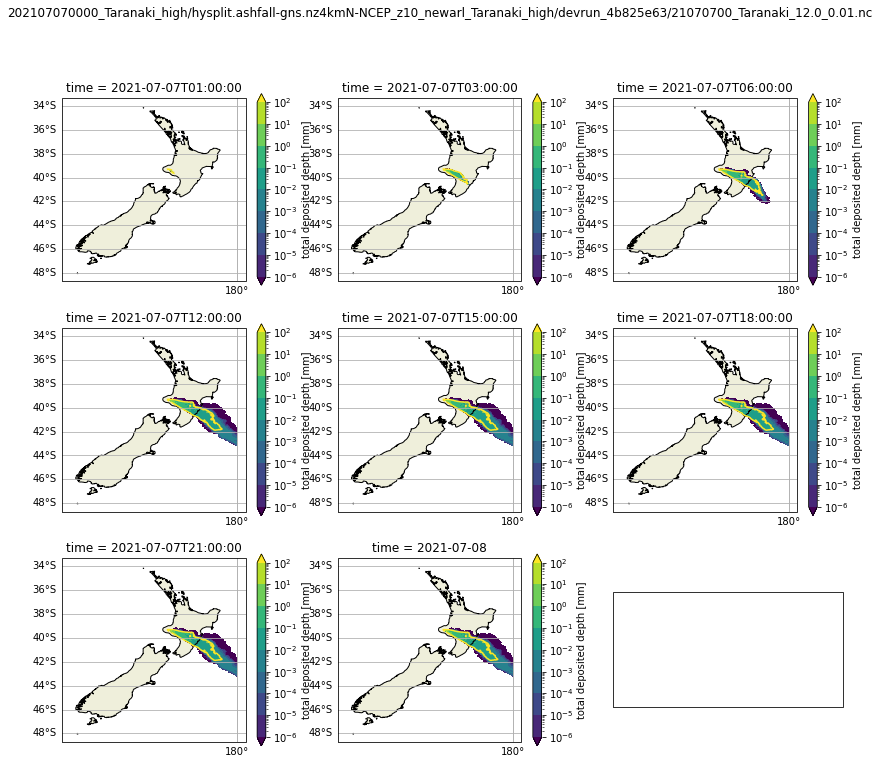

In [6]:
its = [0,2,5,11,14,17,20,23]
fig, axs = plt.subplots(3, 3, figsize=(14,12), subplot_kw={"projection": ccrs.PlateCarree(clon)})
for iplot, it in enumerate(its):
    da1 = ds['total_deposition'].isel(time=it)
    ax = axs.flatten()[iplot]
    da1.plot(ax=ax, levels=levs, vmin=levs[0], vmax=levs[-1], norm=matplotlib.colors.LogNorm(), transform=ccrs.PlateCarree())
    da1.plot.contour(ax=ax, levels=[0.01], color='k', transform=ccrs.PlateCarree())
    plot_decor(ax=ax)
fig.suptitle(filepath)

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'ls', 'label'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


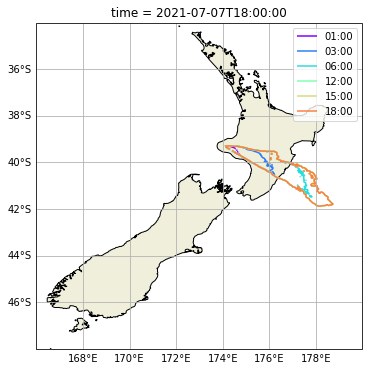

In [7]:
cmap = matplotlib.cm.rainbow
its = [0, 2,5,11,14,17] #,17,20,23]
norm = matplotlib.colors.Normalize(vmin=0, vmax=len(its))

fig, ax = plt.subplots(1,1, figsize=(8,6), subplot_kw={"projection": ccrs.PlateCarree(clon)})
plot_decor(ax=ax)

cs_list = []
for i,it in enumerate(its):
    da1 = ds['total_deposition'].isel(time=it)    
    #da1.plot(ax=ax, levels=levs, vmin=levs[0], vmax=levs[-1], norm=colors.LogNorm(), transform=ccrs.PlateCarree())
    
    ts = pd.to_datetime(str(da1['time'].data))     
    cs = da1.plot.contour(ax=ax, levels=[0.01], colors=[cmap(norm(i))], ls='--', transform=ccrs.PlateCarree(), label=ts.strftime('%Y-%m-%d %H:%M'))    
    cs_list += cs.collections

ax.legend(cs_list, [pd.to_datetime(x).strftime('%H:%M') for x in ds['time'][its].data])

# Read multiple files at fixed it

In [8]:
it = 23
threshold = 0.01

In [9]:
ds = xr.open_mfdataset(files, combine='nested', concat_dim=['nwp'])

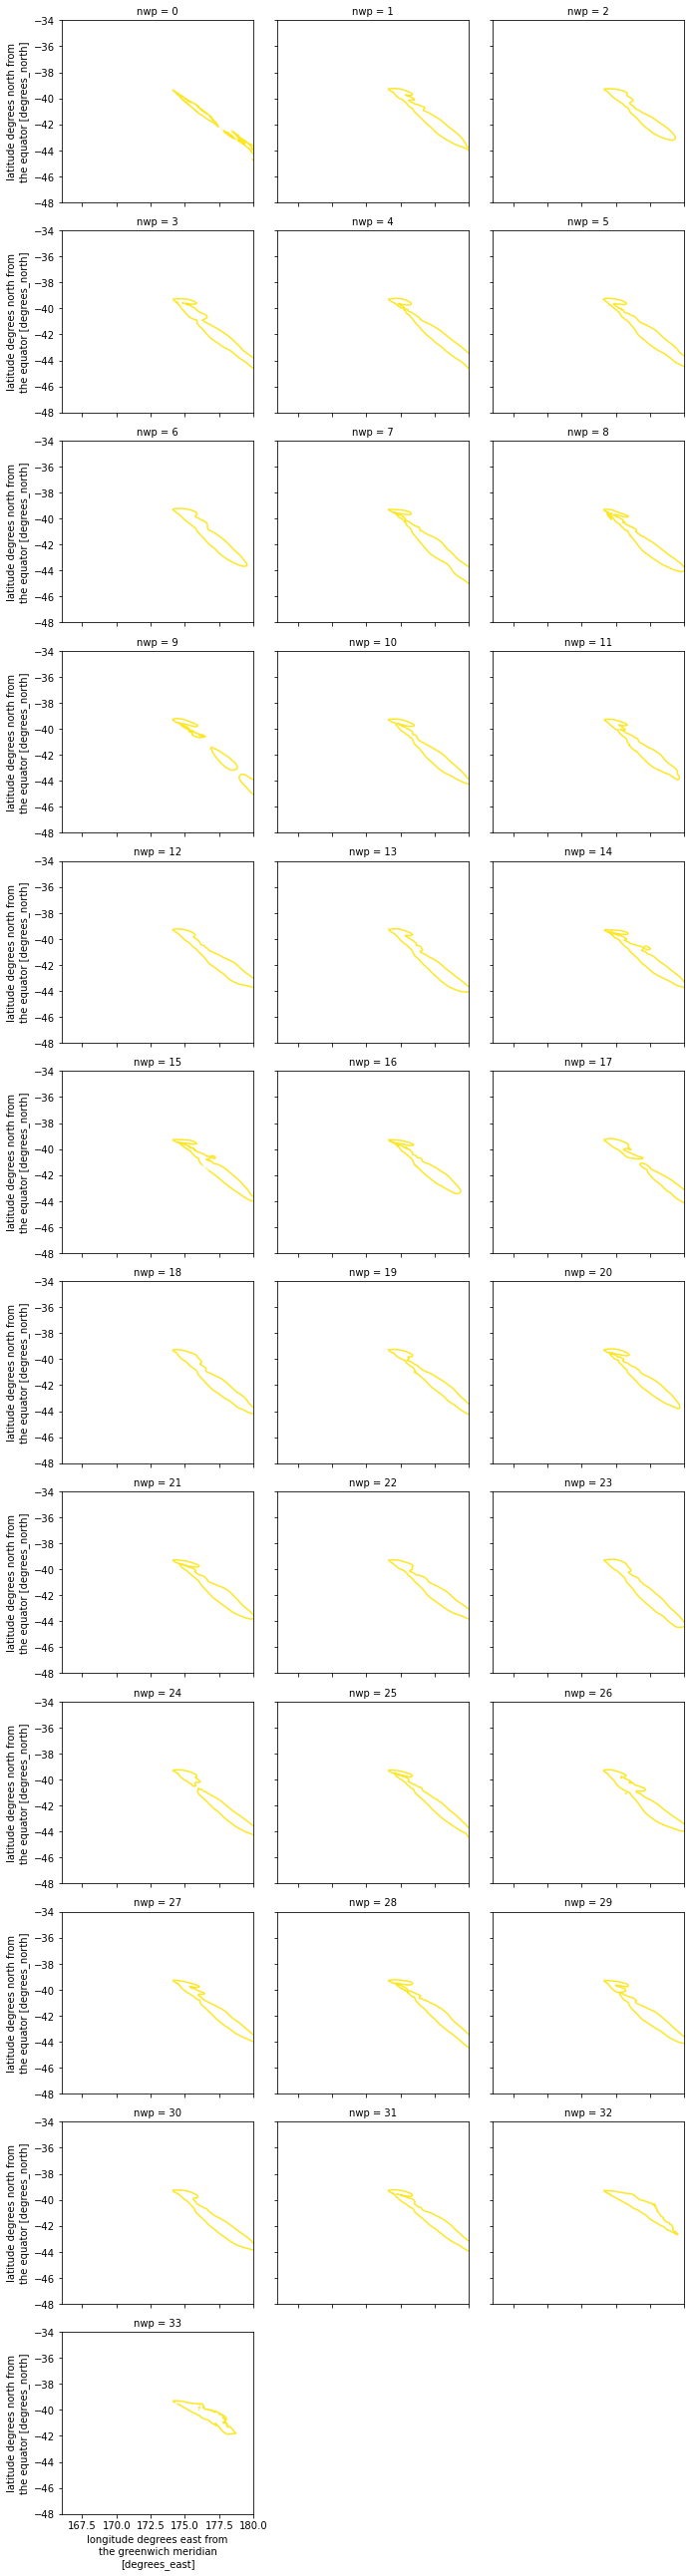

In [10]:
ds['total_deposition'].isel(time=it).plot.contour(col='nwp', col_wrap=3, levels=[threshold])

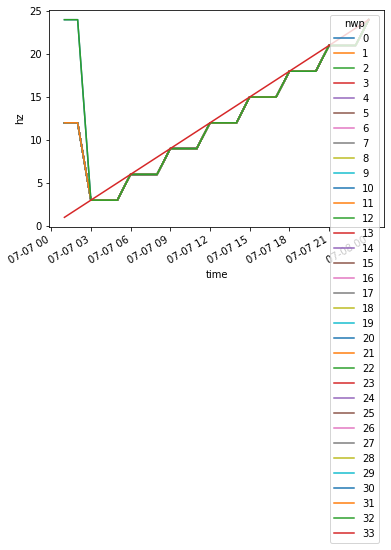

In [11]:
# checking hz is fine
_ = (ds['hz'].astype('float')/1e9/3600).plot.line(x='time')

In [12]:
nmod, nt, ny, nx = ds['total_deposition'].shape
print(nmod, nt, ny, nx)

da_sum = np.zeros((nx,ny))
for n in range(nmod):
    da1 = ds['total_deposition'].isel(time=it, nwp=n)
    da1m = np.zeros((nx,ny))
    da1m[da1>threshold] = 1
    da_sum += da1m

da_sum = da_sum/nmod
da_sum2 = np.ma.masked_where(da_sum<=almost_zero,da_sum)

34 24 1401 1401


In [13]:
vname = 'prob_above_{}'.format(threshold)
print(vname)
ds_final = xr.Dataset({vname: (['lat', 'lon'], da_sum2)}, coords={'lon': ds.lon, 'lat': ds.lat})
ds_final

prob_above_0.01


<xarray.Dataset>
Dimensions:          (lat: 1401, lon: 1401)
Coordinates:
  * lon              (lon) float32 166.0 166.0 166.0 166.0 ... 180.0 180.0 180.0
  * lat              (lat) float32 -48.0 -47.99 -47.98 ... -34.02 -34.01 -34.0
Data variables:
    prob_above_0.01  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

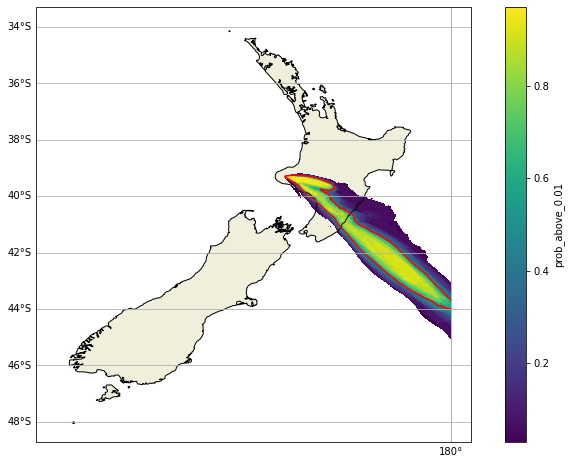

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12,8), subplot_kw={"projection": ccrs.PlateCarree(clon)})
plot_decor(ax=ax)
ds_final[vname].plot(ax=ax, transform=ccrs.PlateCarree())
ds_final[vname].plot.contour(ax=ax, levels=[0.5], colors=['red'], transform=ccrs.PlateCarree())
